In [1]:
import numpy as np
np.__version__

'1.14.0'

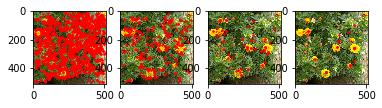

[[218.45420145   9.86922042   1.24414662 355.05016293]
 [223.98283447  11.04547493   1.20834899 350.86711502]
 [223.98283447  11.04547493   1.20834899 351.78233281]
 ...
 [492.00087614 496.5999301    1.25092856 186.8259528 ]
 [ 80.91371022 499.61027381   1.19509421 195.02052191]
 [464.51414817 500.91375142   1.24656099 297.60519539]]


In [37]:
from skimage.io import imread
from sift import SIFT
import numpy as np
import argparse
import pickle
import os
from os.path import isdir

import matplotlib.pyplot as plt


im = imread("flower.png")

sift_detector = SIFT(im)
_ = sift_detector.get_features()
kp_pyr = sift_detector.kp_pyr

if not isdir('results'):
    os.mkdir('results')

# pickle.dump(sift_detector.kp_pyr, open('results/%s_kp_pyr.pkl' % "", 'wb'))
_, ax = plt.subplots(1, sift_detector.num_octave)

for i in range(sift_detector.num_octave):
    ax[i].imshow(im)

    scaled_kps = kp_pyr[i] * (2**i)
    ax[i].scatter(scaled_kps[:,0], scaled_kps[:,1], c='r', s=2.5)

plt.show()

print kp_pyr[0]

In [38]:
print sift_detector.get_features()[2]


[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67610082e-03,
       1.09722123e-01, 1.33475977e-14, 3.85521799e-02, 6.45339071e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60639351e-13,
       2.98971981e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.98132390e-14, 3.16569597e-08, 3.77517964e-08,
       1.51602000e-01, 3.18904631e-02, 0.00000000e+00, 0.00000000e+00,
       2.36914459e-15, 0.00000000e+00, 0.00000000e+00, 6.03426583e-02,
       2.16915905e-02, 1.85803195e-08, 1.77544752e-08, 0.00000000e+00,
       3.44717636e-13, 2.98971981e-01, 1.88292891e-01, 1.48009846e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.46238223e-01, 1.09452380e-07, 0.00000000e+00, 3.37035331e-13,
       3.75786406e-08, 0.00000000e+00, 4.39502550e-08, 1.16125658e-01,
       2.98971981e-01, 8.30148451e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.41492870e-07,
     

In [39]:
print kp_pyr[0]

[[218.45420145   9.86922042   1.24414662 355.05016293]
 [223.98283447  11.04547493   1.20834899 350.86711502]
 [223.98283447  11.04547493   1.20834899 351.78233281]
 ...
 [492.00087614 496.5999301    1.25092856 186.8259528 ]
 [ 80.91371022 499.61027381   1.19509421 195.02052191]
 [464.51414817 500.91375142   1.24656099 297.60519539]]


In [40]:
descriptor=sift_detector.get_features()[1]
print type(descriptor)

<type 'list'>


In [42]:
import math
import matplotlib.image as mpimg
from PIL import Image, ImageDraw

im = Image.open("flower.png")

draw = ImageDraw.Draw(im)
for i in range(len(descriptor)):
    res=[]
    res90=[]
    res180=[]
    res270=[]
    octave=1
    for j in range(len(descriptor)):
        if i==j:
            continue
        descriptor[i]
        temp=0
        temp90=0
        temp180=0
        temp270=0
        
        for k in range(len(descriptor[i])):
            temp+=(descriptor[i][k]-descriptor[j][k])**2
        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
            res.append([math.sqrt(temp),i,j])
    
        for a in range(4):
            for b in range(4):
                for c in range(8):
                    temp270+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][b*4*8+a*8+c])**2;
        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
            res270.append([math.sqrt(temp270),i,j])
 
        for a in range(4):
                for b in range(4):
                    for c in range(8):
                        temp180+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][(3-a)*4*8+b*8+c])**2;
        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
            res180.append([math.sqrt(temp180),i,j])

        for a in range(4):
                for b in range(4):
                    for c in range(8):
                        temp90+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][b*4*8+(3-a)*8+c])**2;
        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
            res90.append([math.sqrt(temp90),i,j])
    res90.sort()
    res180.sort()
    res270.sort()
    res.sort()
#     print res
    thres=0.90
    rat=res[0][0]/res[1][0]
    temp=octave
    if rat<thres:
        print rat
        
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res[0][2]][0]*(2**temp), kp_pyr[temp][res[0][2]][1]*(2**temp)), fill=128)
    rat=res90[0][0]/res90[1][0]
    if rat<thres:
        print rat
       
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res90[0][2]][0]*(2**temp), kp_pyr[temp][res90[0][2]][1]*(2**temp)), fill=128)
    rat=res180[0][0]/res180[1][0]
    if rat<thres:
        print rat
     
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res180[0][2]][0]*(2**temp), kp_pyr[temp][res180[0][2]][1]*(2**temp)), fill=128)
    rat=res270[0][0]/res270[1][0]
    if rat<thres:
        print rat
   
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res270[0][2]][0]*(2**temp), kp_pyr[temp][res270[0][2]][1]*(2**temp)), fill=128)
    
im.save("drawn_grid.png")

0.847585977081
0.837234229908
0.621405845488
0.830114996978
0.693986497037
0.889777112684
0.675044401722
0.739057681088
0.850014775796
0.892533382493
0.89274655435
0.863982135597
0.869064968541
0.873258132014
0.861633860501
0.867910902837
0.884024358846
0.89673190453
0.889155515726
0.875779320985
0.897343342999
0.825604598528
0.827305573619
0.874594666287
0.886298185388
0.791015518142
0.893409290793
0.855554010689
0.859835923743
0.881810618696
0.899067394694
0.863006912921
0.898572057118
0.83869253223
0.848620759593
0.891631422005
0.840739870788
0.873876038777
0.884005172577
0.889708455068
0.844351723364
0.84902494729
0.893482939648
0.887181519591
0.844420486533
0.890162107826
0.84296190166
0.806553553951
0.887328850028
0.892000565653
0.886427666238
0.897094532902
0.892416365129
0.886746032931
0.886706279774
0.898208360647
0.823889368191
0.89549562113
0.772040511542
0.865305518709
0.882768685306
0.87154539127
0.789467574321
